# Togo Solar Data - Exploratory Data Analysis (EDA)

## Task 2: Data Profiling, Cleaning & EDA

This notebook performs comprehensive exploratory data analysis on the Togo solar dataset, including:
- Summary statistics and missing value analysis
- Outlier detection and data cleaning
- Time series analysis
- Correlation and relationship analysis
- Wind and distribution analysis
- Temperature analysis
- Export of cleaned dataset


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Libraries imported successfully!")


Libraries imported successfully!


In [8]:
# Load the dataset
df = pd.read_csv('./data/togo-dapaong_qc.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index for time series analysis
df_indexed = df.set_index('Timestamp')

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (525600, 19)
Date range: 2021-10-25 00:01:00 to 2022-10-25 00:00:00

First few rows:


Timestamp   GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.30 0.00 0.00  0.00  0.00 24.80 94.50 0.90    1.10   
1 2021-10-25 00:02:00 -1.30 0.00 0.00  0.00  0.00 24.80 94.40 1.10    1.60   
2 2021-10-25 00:03:00 -1.30 0.00 0.00  0.00  0.00 24.80 94.40 1.20    1.40   
3 2021-10-25 00:04:00 -1.20 0.00 0.00  0.00  0.00 24.80 94.30 1.20    1.60   
4 2021-10-25 00:05:00 -1.20 0.00 0.00  0.00  0.00 24.80 94.00 1.30    1.60   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0     0.40 227.60     1.10  977         0           0.00  24.70  24.40   
1     0.40 229.30     0.70  977         0           0.00  24.70  24.40   
2     0.30 228.50     2.90  977         0           0.00  24.70  24.40   
3     0.30 229.10     4.60  977         0           0.00  24.70  24.40   
4     0.40 227.50     1.60  977         0           0.00  24.70  24.40   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

## 1. Summary Statistics & Missing Value Report


In [9]:
# Summary statistics for all numeric columns
print("=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe())


SUMMARY STATISTICS


            GHI       DNI       DHI      ModA      ModB      Tamb        RH  \
count 525600.00 525600.00 525600.00 525600.00 525600.00 525600.00 525600.00   
mean     230.56    151.26    116.44    226.14    219.57     27.75     55.01   
std      322.53    250.96    156.52    317.35    307.93      4.76     28.78   
min      -12.70      0.00      0.00      0.00      0.00     14.90      3.30   
25%       -2.20      0.00      0.00      0.00      0.00     24.20     26.50   
50%        2.10      0.00      2.50      4.40      4.30     27.20     59.30   
75%      442.40    246.40    215.70    422.52    411.00     31.10     80.80   
max     1424.00   1004.50    805.70   1380.00   1367.00     41.40     99.80   

             WS    WSgust   WSstdev        WD   WDstdev        BP  Cleaning  \
count 525600.00 525600.00 525600.00 525600.00 525600.00 525600.00 525600.00   
mean       2.37      3.23      0.56    161.74     10.56    975.92      0.00   
std        1.46      1.88      0.27     91.88      

In [10]:
# Missing value analysis
print("=" * 80)
print("MISSING VALUE REPORT")
print("=" * 80)
missing_data = df.isna().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    print(f"\nColumns with >5% nulls:")
    high_missing = missing_df[missing_df['Missing Percentage'] > 5]
    if len(high_missing) > 0:
        print(high_missing)
    else:
        print("None")
else:
    print("No missing values found in the dataset!")


MISSING VALUE REPORT
          Missing Count  Missing Percentage
Comments         525600              100.00

Columns with >5% nulls:
          Missing Count  Missing Percentage
Comments         525600              100.00


## 2. Outlier Detection & Basic Cleaning


In [11]:
# Key columns for outlier detection
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for key columns
print("=" * 80)
print("OUTLIER DETECTION USING Z-SCORES (|Z| > 3)")
print("=" * 80)

outlier_summary = {}
for col in key_columns:
    if col in df.columns:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = (z_scores > 3).sum()
        outlier_percent = (outliers / len(df[col].dropna())) * 100
        outlier_summary[col] = {
            'Outlier Count': outliers,
            'Outlier Percentage': outlier_percent
        }
        print(f"{col}: {outliers} outliers ({outlier_percent:.2f}%)")

outlier_df = pd.DataFrame(outlier_summary).T
print("\nSummary:")
print(outlier_df)


OUTLIER DETECTION USING Z-SCORES (|Z| > 3)


GHI: 305 outliers (0.06%)
DNI: 1062 outliers (0.20%)
DHI: 3415 outliers (0.65%)
ModA: 137 outliers (0.03%)
ModB: 206 outliers (0.04%)
WS: 3510 outliers (0.67%)
WSgust: 3915 outliers (0.74%)

Summary:
        Outlier Count  Outlier Percentage
GHI            305.00                0.06
DNI           1062.00                0.20
DHI           3415.00                0.65
ModA           137.00                0.03
ModB           206.00                0.04
WS            3510.00                0.67
WSgust        3915.00                0.74


In [12]:
# Create a copy for cleaning
df_clean = df.copy()

# Flag rows with outliers (|Z| > 3) in any key column
outlier_flags = pd.Series([False] * len(df_clean), index=df_clean.index)

for col in key_columns:
    if col in df_clean.columns:
        z_scores = np.abs(stats.zscore(df_clean[col].dropna()))
        col_outliers = df_clean[col].notna() & (z_scores > 3)
        outlier_flags = outlier_flags | col_outliers

df_clean['Outlier_Flag'] = outlier_flags
print(f"Total rows flagged as outliers: {outlier_flags.sum()} ({outlier_flags.sum()/len(df_clean)*100:.2f}%)")


Total rows flagged as outliers: 9251 (1.76%)


In [13]:
# Handle missing values in key columns
# Impute with median for numeric columns
key_numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'RH', 'BP', 'TModA', 'TModB']

for col in key_numeric_cols:
    if col in df_clean.columns:
        missing_before = df_clean[col].isna().sum()
        if missing_before > 0:
            median_value = df_clean[col].median()
            df_clean[col].fillna(median_value, inplace=True)
            print(f"{col}: Imputed {missing_before} missing values with median ({median_value:.2f})")

print("\nMissing values after imputation:")
print(df_clean[key_numeric_cols].isna().sum().sum(), "total missing values remaining")



Missing values after imputation:
0 total missing values remaining


In [14]:
# Remove rows with outliers (optional - we'll keep them flagged for now)
# For final cleaned dataset, we can either:
# 1. Remove outliers
# 2. Cap outliers to 3 standard deviations
# 3. Keep them but flag them

# Option: Cap outliers to 3 standard deviations
df_cleaned_final = df_clean.copy()
for col in key_columns:
    if col in df_cleaned_final.columns:
        mean_val = df_cleaned_final[col].mean()
        std_val = df_cleaned_final[col].std()
        lower_bound = mean_val - 3 * std_val
        upper_bound = mean_val + 3 * std_val
        df_cleaned_final[col] = df_cleaned_final[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped to ±3 standard deviations")


Outliers capped to ±3 standard deviations


## 3. Time Series Analysis


In [15]:
# Prepare data for time series
df_ts = df_cleaned_final.set_index('Timestamp')

# Create time-based features
df_ts['Hour'] = df_ts.index.hour
df_ts['Month'] = df_ts.index.month
df_ts['Day'] = df_ts.index.dayofyear


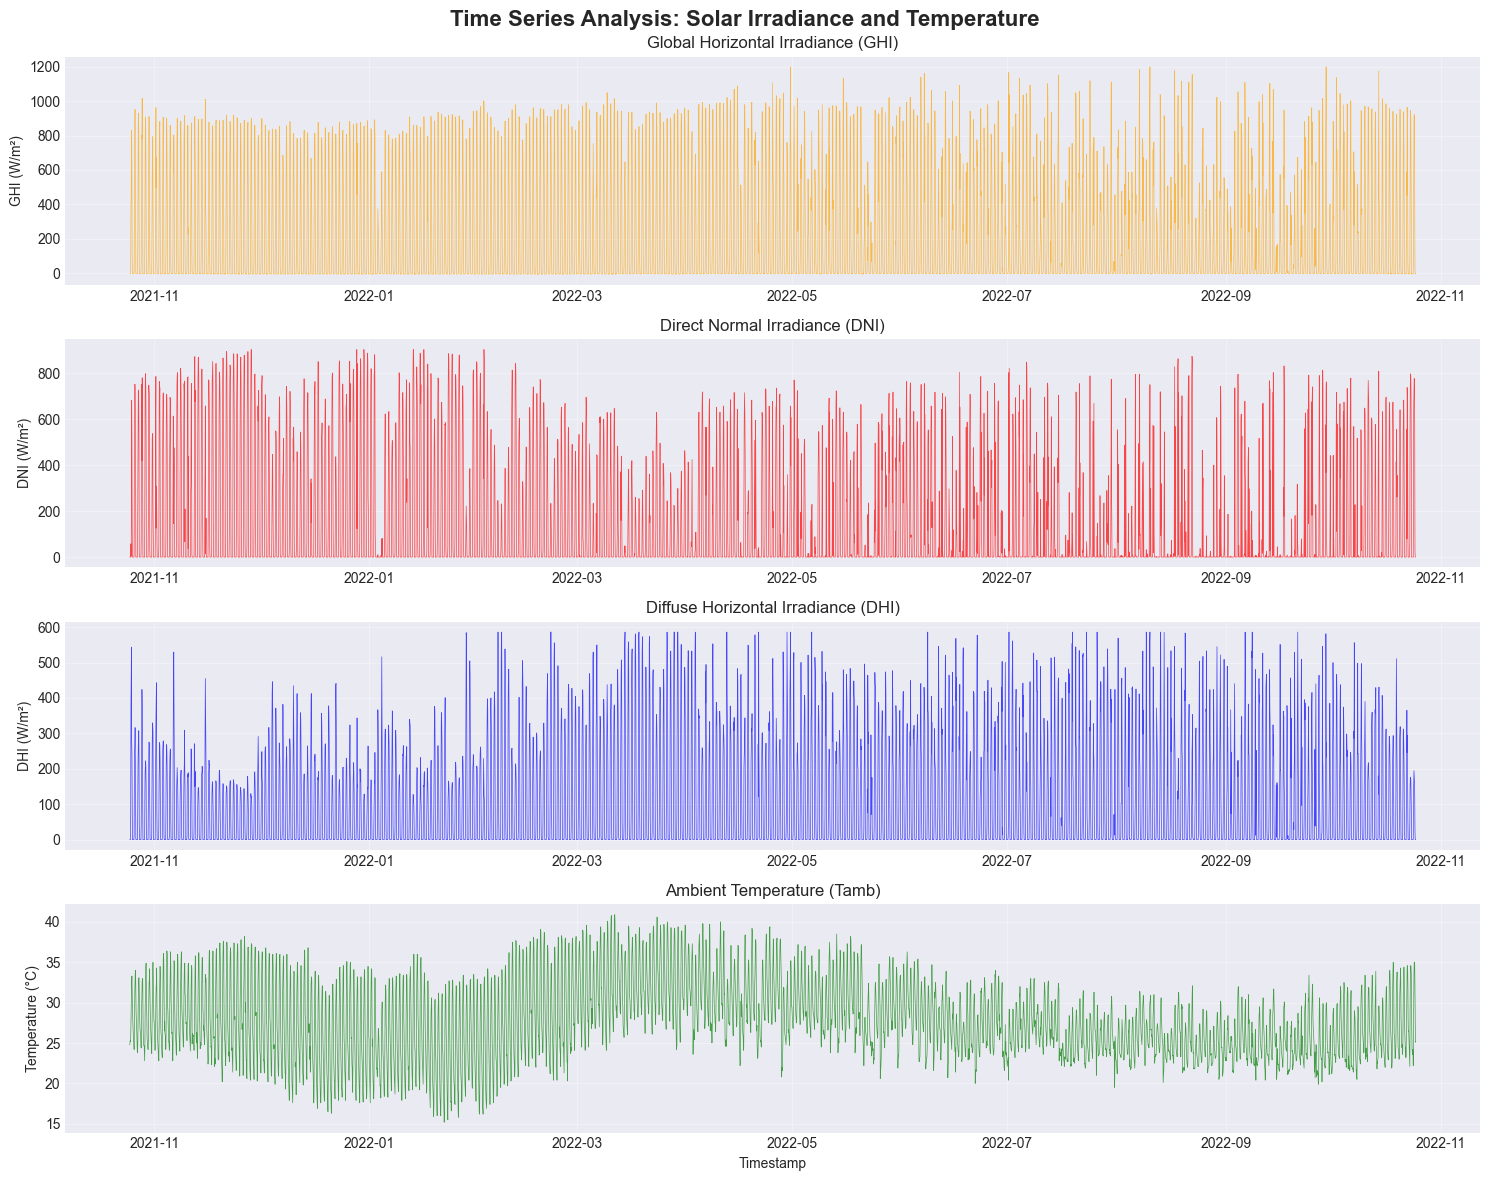

In [16]:
# Time series plot: GHI, DNI, DHI, Tamb vs. Timestamp
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Time Series Analysis: Solar Irradiance and Temperature', fontsize=16, fontweight='bold')

# Sample data for visualization (every 100th point for performance)
sample_df = df_ts.iloc[::100]

# GHI
axes[0].plot(sample_df.index, sample_df['GHI'], linewidth=0.5, alpha=0.7, color='orange')
axes[0].set_ylabel('GHI (W/m²)', fontsize=10)
axes[0].set_title('Global Horizontal Irradiance (GHI)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# DNI
axes[1].plot(sample_df.index, sample_df['DNI'], linewidth=0.5, alpha=0.7, color='red')
axes[1].set_ylabel('DNI (W/m²)', fontsize=10)
axes[1].set_title('Direct Normal Irradiance (DNI)', fontsize=12)
axes[1].grid(True, alpha=0.3)

# DHI
axes[2].plot(sample_df.index, sample_df['DHI'], linewidth=0.5, alpha=0.7, color='blue')
axes[2].set_ylabel('DHI (W/m²)', fontsize=10)
axes[2].set_title('Diffuse Horizontal Irradiance (DHI)', fontsize=12)
axes[2].grid(True, alpha=0.3)

# Tamb
axes[3].plot(sample_df.index, sample_df['Tamb'], linewidth=0.5, alpha=0.7, color='green')
axes[3].set_ylabel('Temperature (°C)', fontsize=10)
axes[3].set_title('Ambient Temperature (Tamb)', fontsize=12)
axes[3].set_xlabel('Timestamp', fontsize=10)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


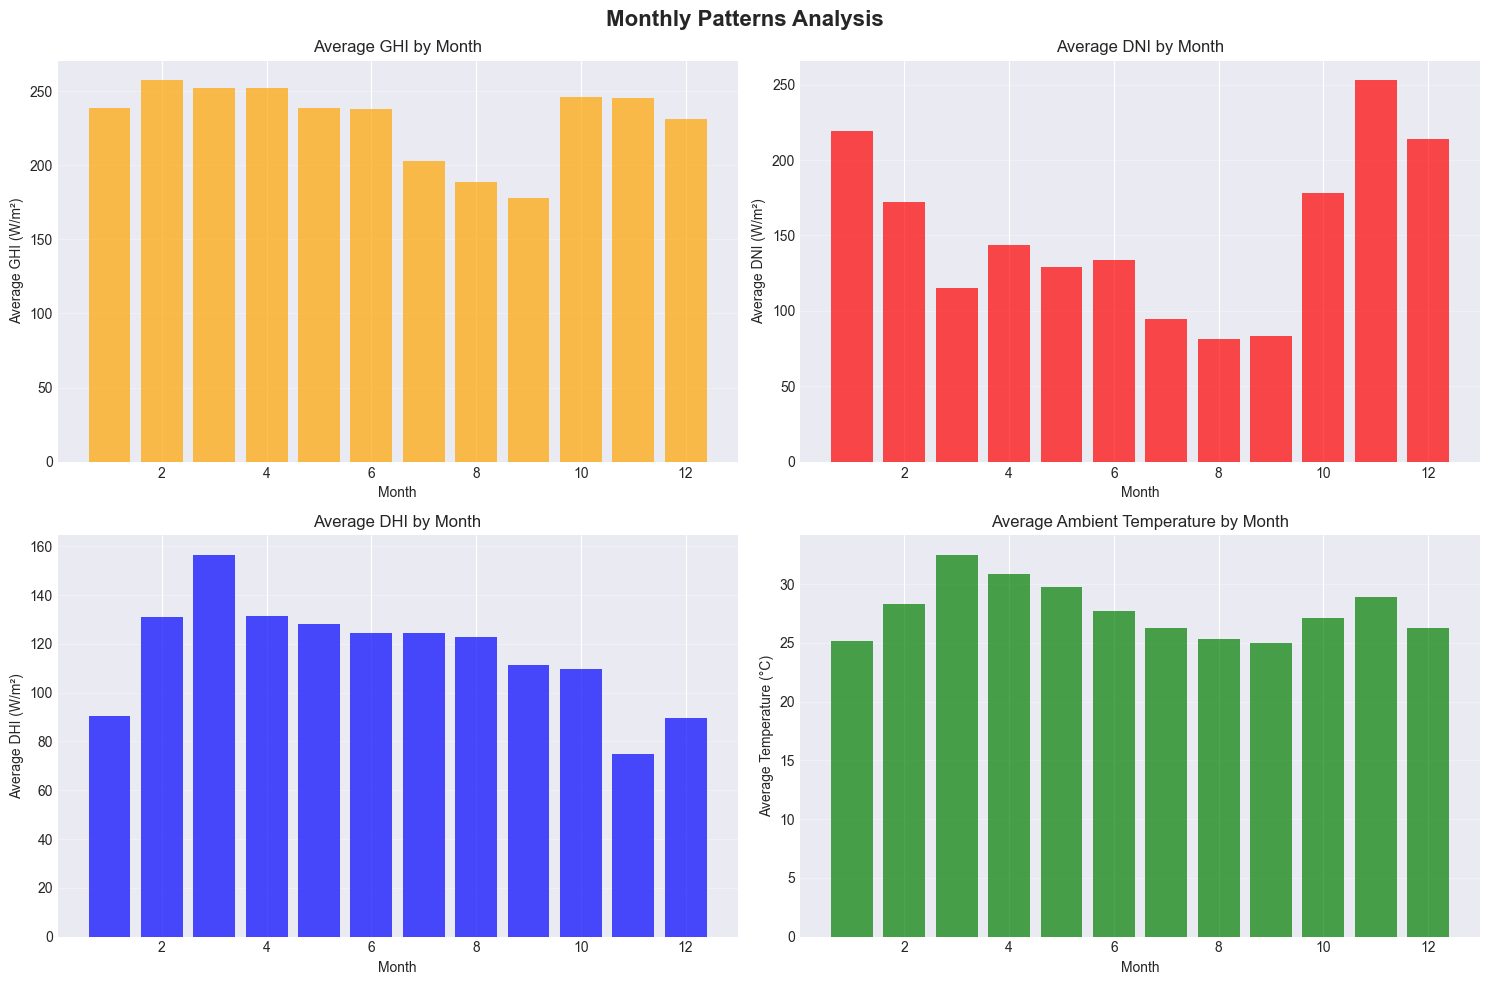

In [17]:
# Monthly patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Monthly Patterns Analysis', fontsize=16, fontweight='bold')

monthly_avg = df_ts.groupby('Month').agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean',
    'Tamb': 'mean'
})

# GHI by month
axes[0, 0].bar(monthly_avg.index, monthly_avg['GHI'], color='orange', alpha=0.7)
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average GHI (W/m²)')
axes[0, 0].set_title('Average GHI by Month')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# DNI by month
axes[0, 1].bar(monthly_avg.index, monthly_avg['DNI'], color='red', alpha=0.7)
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average DNI (W/m²)')
axes[0, 1].set_title('Average DNI by Month')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# DHI by month
axes[1, 0].bar(monthly_avg.index, monthly_avg['DHI'], color='blue', alpha=0.7)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average DHI (W/m²)')
axes[1, 0].set_title('Average DHI by Month')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Tamb by month
axes[1, 1].bar(monthly_avg.index, monthly_avg['Tamb'], color='green', alpha=0.7)
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Temperature (°C)')
axes[1, 1].set_title('Average Ambient Temperature by Month')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


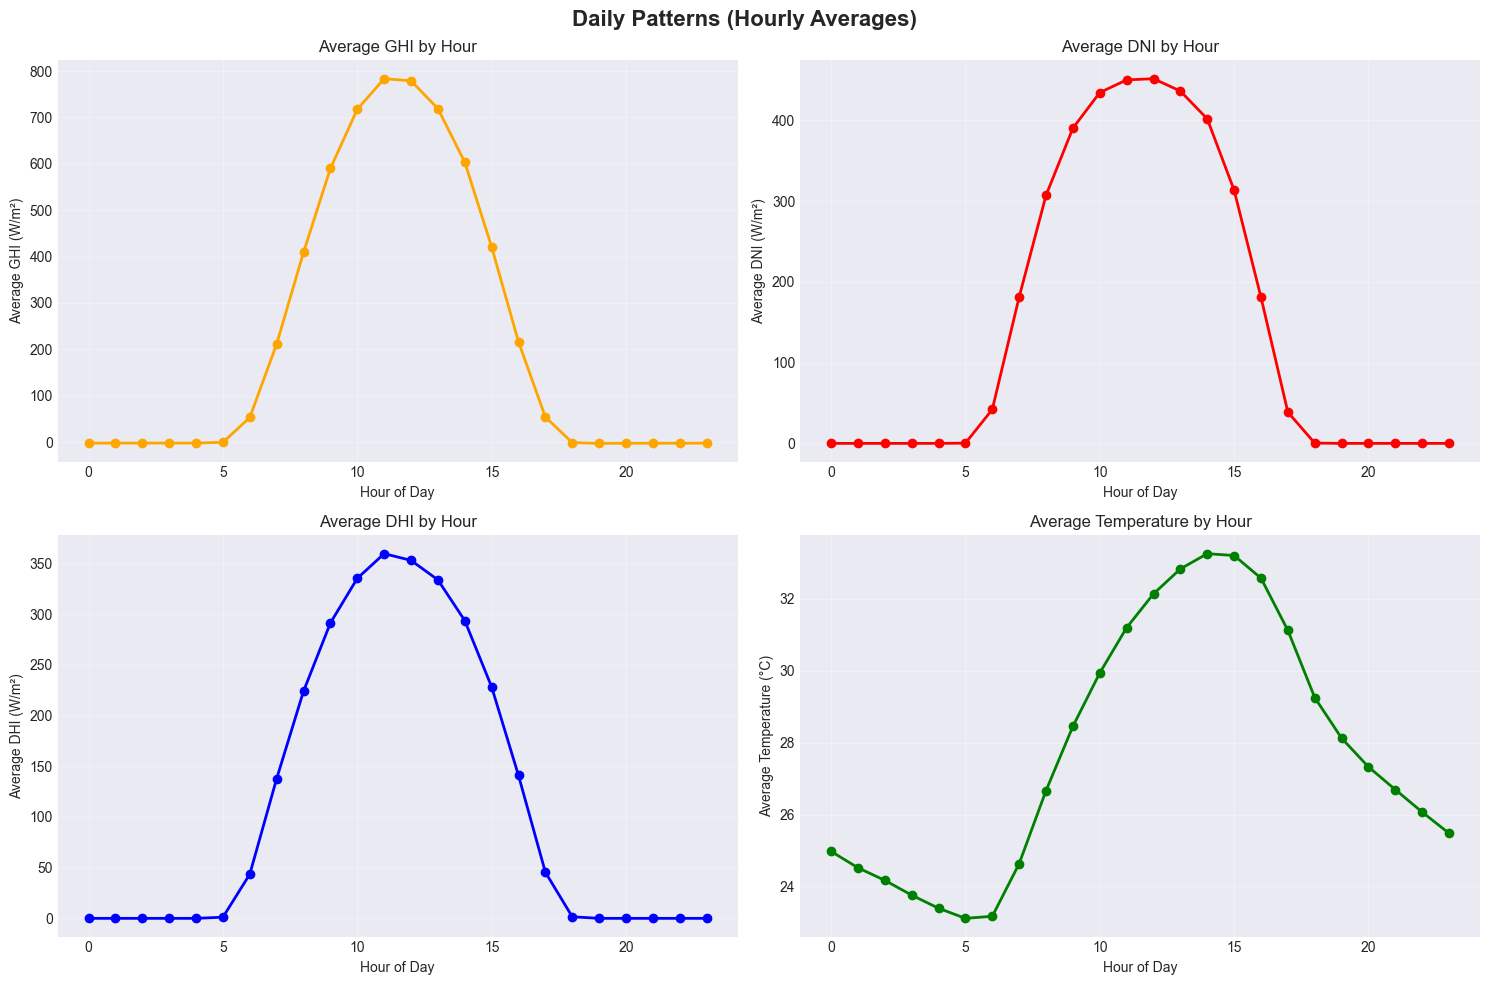

In [18]:
# Daily patterns (by hour)
hourly_avg = df_ts.groupby('Hour').agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean',
    'Tamb': 'mean'
})

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Daily Patterns (Hourly Averages)', fontsize=16, fontweight='bold')

axes[0, 0].plot(hourly_avg.index, hourly_avg['GHI'], marker='o', color='orange', linewidth=2)
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Average GHI (W/m²)')
axes[0, 0].set_title('Average GHI by Hour')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(hourly_avg.index, hourly_avg['DNI'], marker='o', color='red', linewidth=2)
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Average DNI (W/m²)')
axes[0, 1].set_title('Average DNI by Hour')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(hourly_avg.index, hourly_avg['DHI'], marker='o', color='blue', linewidth=2)
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Average DHI (W/m²)')
axes[1, 0].set_title('Average DHI by Hour')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(hourly_avg.index, hourly_avg['Tamb'], marker='o', color='green', linewidth=2)
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Average Temperature (°C)')
axes[1, 1].set_title('Average Temperature by Hour')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Cleaning Impact Analysis


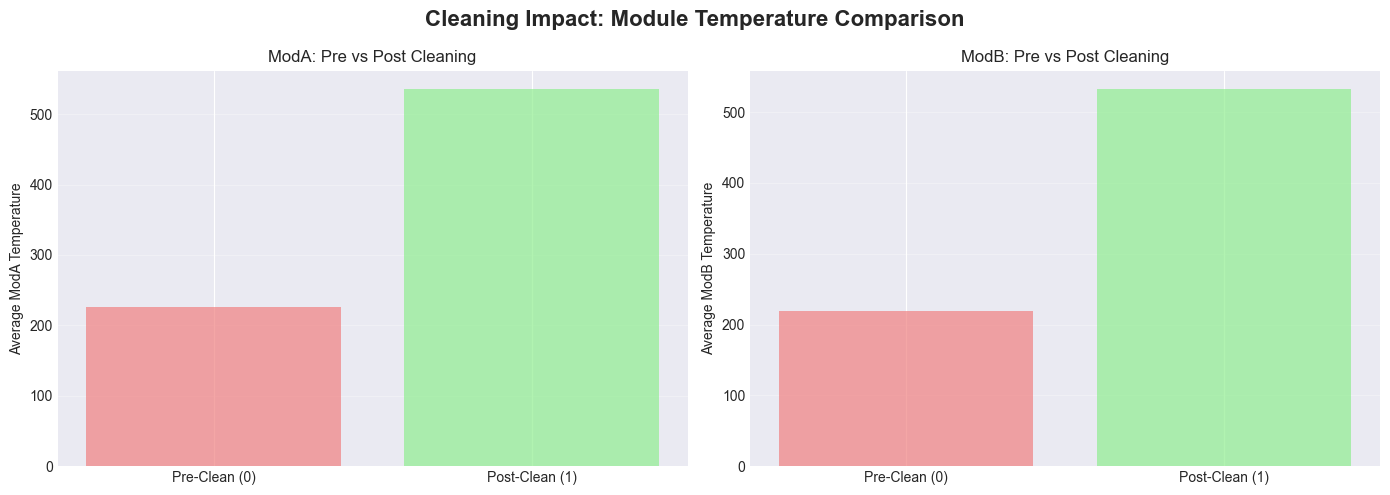

Cleaning Impact Summary:
           ModA   ModB
Cleaning              
0        225.97 219.38
1        535.19 532.21


In [19]:
# Group by Cleaning flag and plot average ModA & ModB pre/post-clean
if 'Cleaning' in df_cleaned_final.columns:
    cleaning_comparison = df_cleaned_final.groupby('Cleaning').agg({
        'ModA': 'mean',
        'ModB': 'mean'
    })
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('Cleaning Impact: Module Temperature Comparison', fontsize=16, fontweight='bold')
    
    x = ['Pre-Clean (0)', 'Post-Clean (1)']
    moda_values = [cleaning_comparison.loc[0, 'ModA'], cleaning_comparison.loc[1, 'ModA']] if 0 in cleaning_comparison.index and 1 in cleaning_comparison.index else [cleaning_comparison['ModA'].iloc[0], cleaning_comparison['ModA'].iloc[-1]]
    modb_values = [cleaning_comparison.loc[0, 'ModB'], cleaning_comparison.loc[1, 'ModB']] if 0 in cleaning_comparison.index and 1 in cleaning_comparison.index else [cleaning_comparison['ModB'].iloc[0], cleaning_comparison['ModB'].iloc[-1]]
    
    axes[0].bar(x, moda_values, color=['lightcoral', 'lightgreen'], alpha=0.7)
    axes[0].set_ylabel('Average ModA Temperature')
    axes[0].set_title('ModA: Pre vs Post Cleaning')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    axes[1].bar(x, modb_values, color=['lightcoral', 'lightgreen'], alpha=0.7)
    axes[1].set_ylabel('Average ModB Temperature')
    axes[1].set_title('ModB: Pre vs Post Cleaning')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("Cleaning Impact Summary:")
    print(cleaning_comparison)
else:
    print("Cleaning flag column not found in dataset")


## 5. Correlation & Relationship Analysis


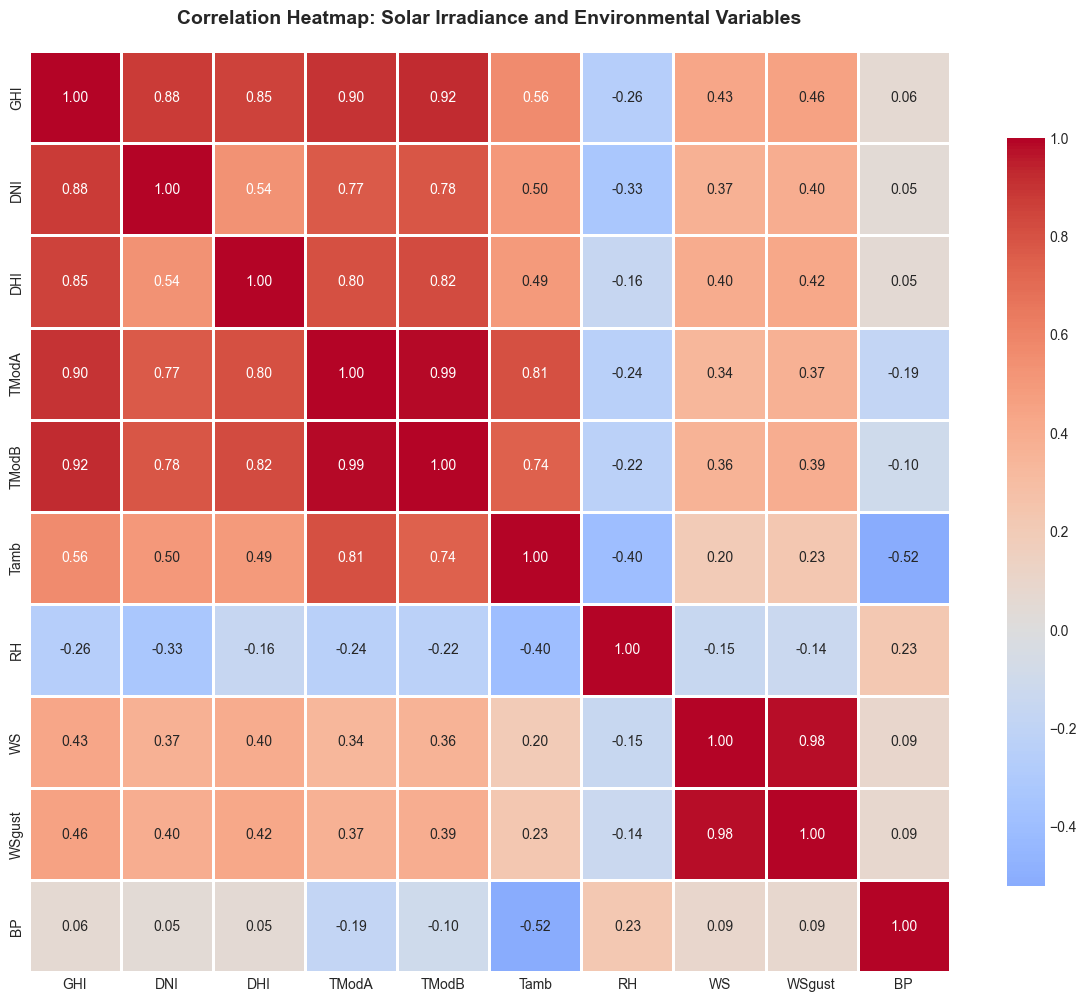

In [20]:
# Correlation heatmap
correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP']
corr_data = df_cleaned_final[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Solar Irradiance and Environmental Variables', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


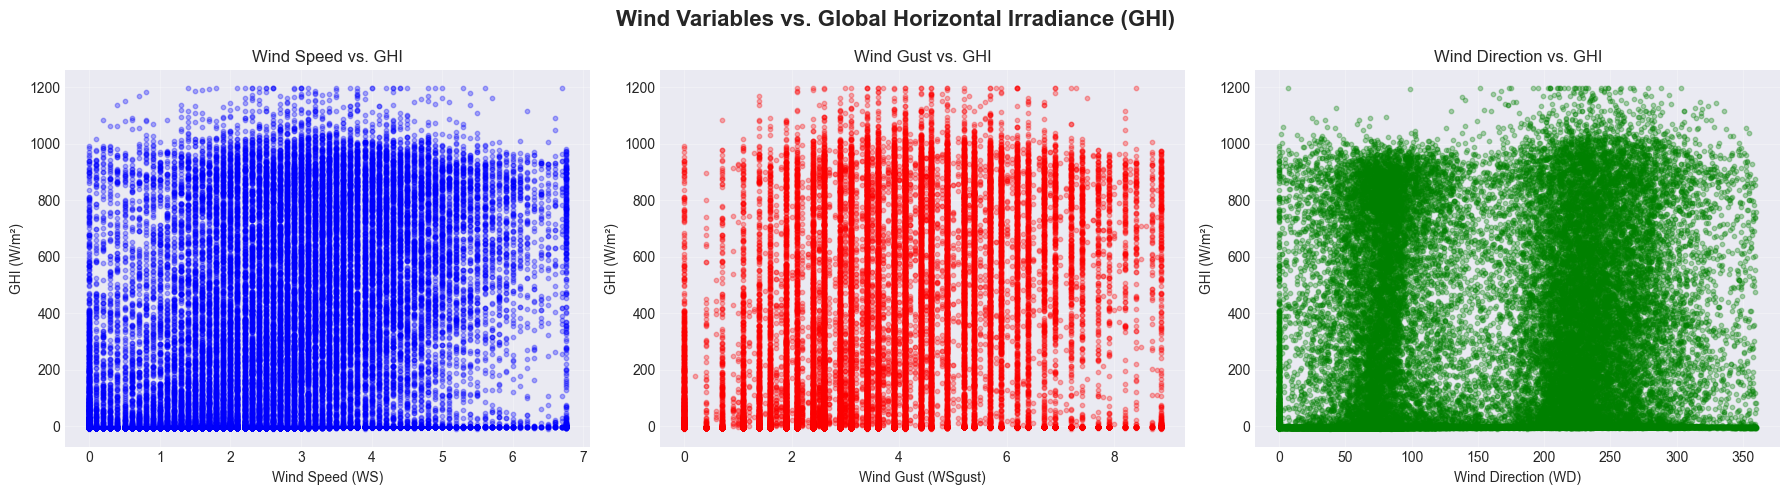

In [21]:
# Scatter plots: WS, WSgust, WD vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Wind Variables vs. Global Horizontal Irradiance (GHI)', fontsize=16, fontweight='bold')

# Sample data for scatter plots (every 10th point for performance)
sample_data = df_cleaned_final.iloc[::10]

# WS vs GHI
axes[0].scatter(sample_data['WS'], sample_data['GHI'], alpha=0.3, s=10, color='blue')
axes[0].set_xlabel('Wind Speed (WS)')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].set_title('Wind Speed vs. GHI')
axes[0].grid(True, alpha=0.3)

# WSgust vs GHI
axes[1].scatter(sample_data['WSgust'], sample_data['GHI'], alpha=0.3, s=10, color='red')
axes[1].set_xlabel('Wind Gust (WSgust)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].set_title('Wind Gust vs. GHI')
axes[1].grid(True, alpha=0.3)

# WD vs GHI
if 'WD' in df_cleaned_final.columns:
    axes[2].scatter(sample_data['WD'], sample_data['GHI'], alpha=0.3, s=10, color='green')
    axes[2].set_xlabel('Wind Direction (WD)')
    axes[2].set_ylabel('GHI (W/m²)')
    axes[2].set_title('Wind Direction vs. GHI')
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


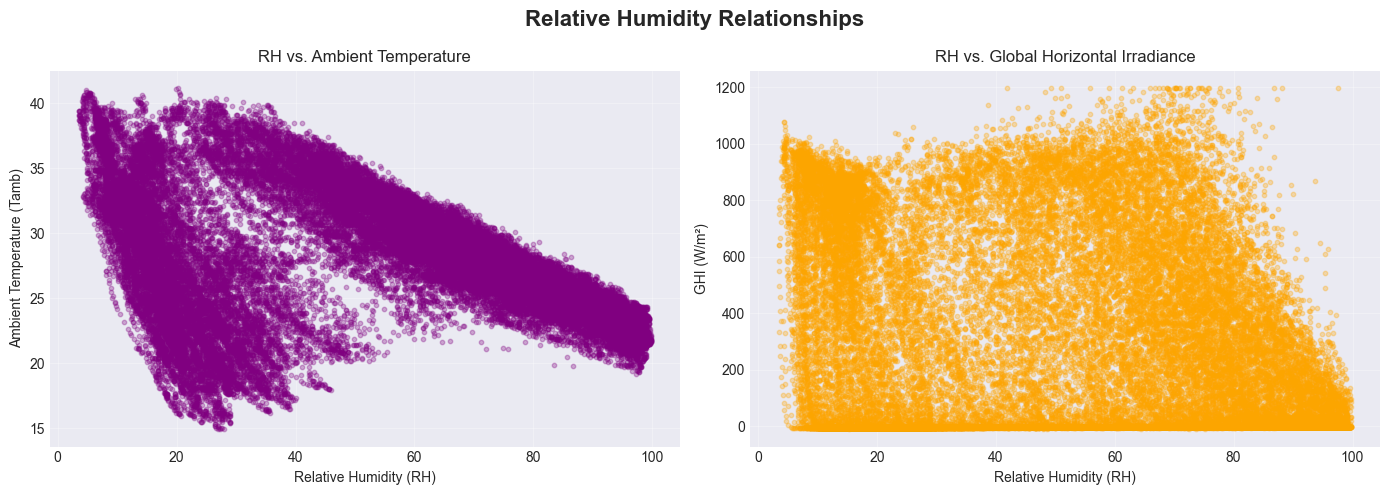

In [22]:
# Scatter plots: RH vs. Tamb and RH vs. GHI
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Relative Humidity Relationships', fontsize=16, fontweight='bold')

# RH vs Tamb
axes[0].scatter(sample_data['RH'], sample_data['Tamb'], alpha=0.3, s=10, color='purple')
axes[0].set_xlabel('Relative Humidity (RH)')
axes[0].set_ylabel('Ambient Temperature (Tamb)')
axes[0].set_title('RH vs. Ambient Temperature')
axes[0].grid(True, alpha=0.3)

# RH vs GHI
axes[1].scatter(sample_data['RH'], sample_data['GHI'], alpha=0.3, s=10, color='orange')
axes[1].set_xlabel('Relative Humidity (RH)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].set_title('RH vs. Global Horizontal Irradiance')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Wind & Distribution Analysis


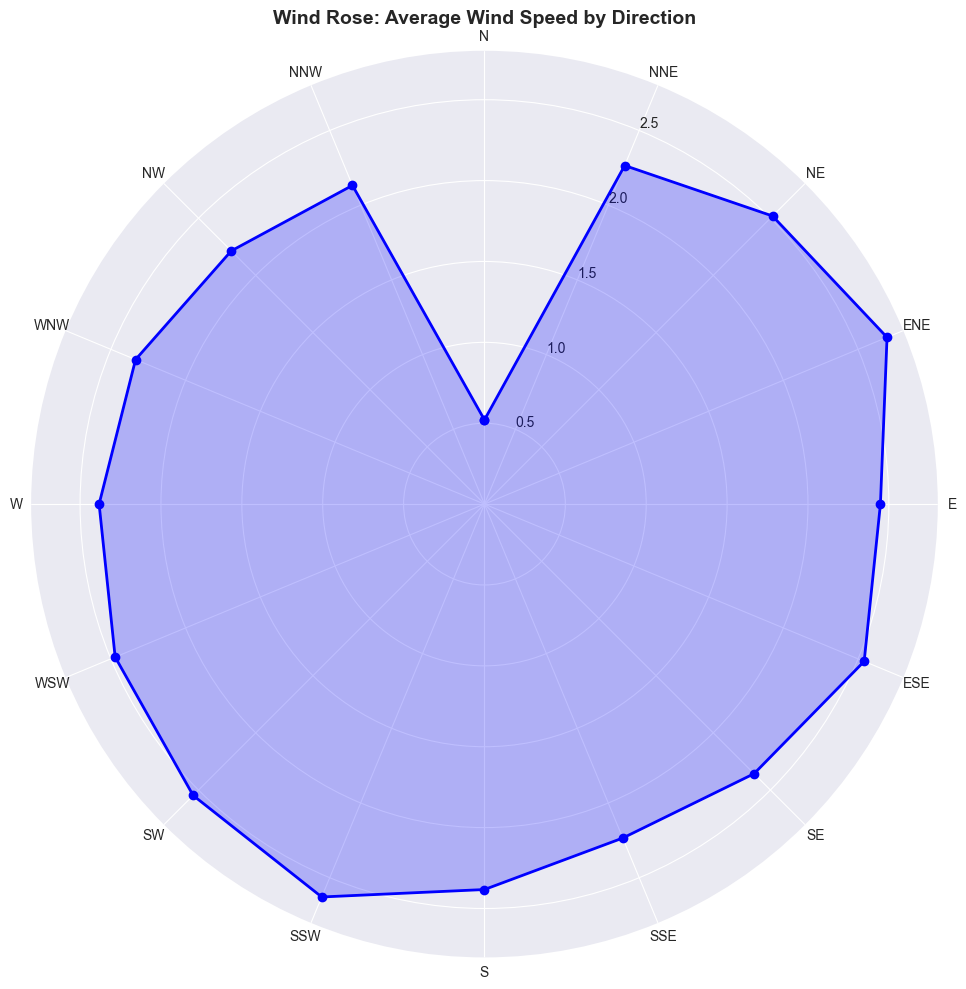

In [23]:
# Wind Rose (Radial bar plot of WS/WD)
if 'WD' in df_cleaned_final.columns and 'WS' in df_cleaned_final.columns:
    # Create wind direction bins (0-360 degrees in 16 directions)
    df_cleaned_final['WD_bin'] = pd.cut(df_cleaned_final['WD'], bins=16, labels=range(16))
    
    # Calculate average wind speed by direction
    wind_rose = df_cleaned_final.groupby('WD_bin')['WS'].mean()
    
    # Create radial plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    theta = np.linspace(0, 2 * np.pi, 16, endpoint=False)
    theta = np.concatenate((theta, [theta[0]]))  # Close the circle
    values = wind_rose.values
    values = np.concatenate((values, [values[0]]))  # Close the circle
    
    ax.plot(theta, values, 'o-', linewidth=2, color='blue')
    ax.fill(theta, values, alpha=0.25, color='blue')
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.arange(0, 360, 22.5), ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                                                 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])
    ax.set_title('Wind Rose: Average Wind Speed by Direction', fontsize=14, fontweight='bold', pad=20)
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("Wind direction (WD) or Wind speed (WS) columns not available")


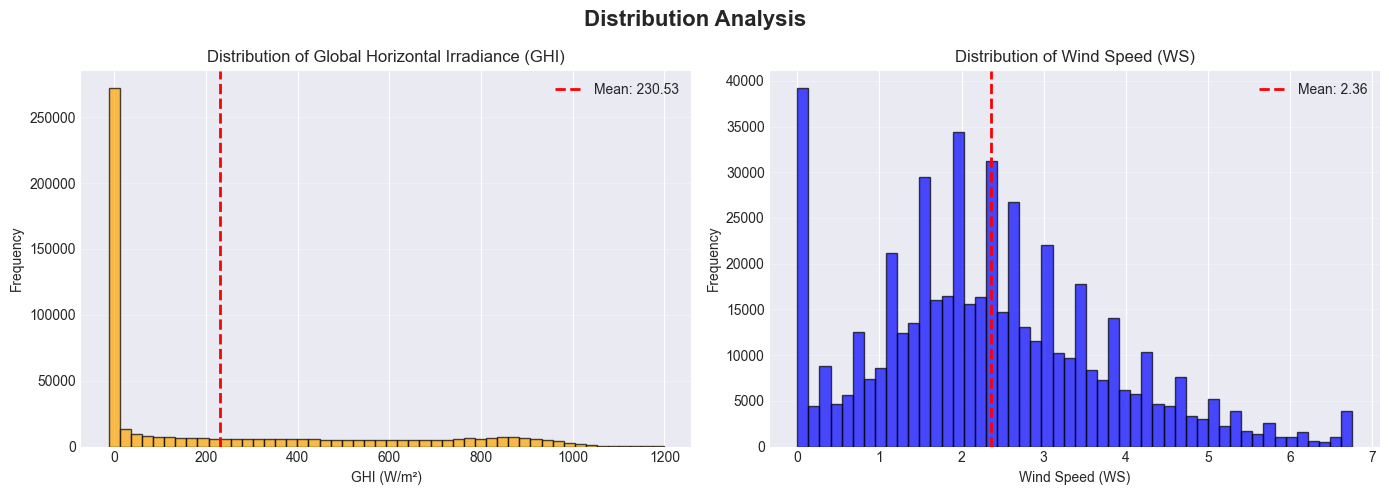

In [24]:
# Histograms for GHI and WS
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribution Analysis', fontsize=16, fontweight='bold')

# GHI histogram
axes[0].hist(df_cleaned_final['GHI'].dropna(), bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('GHI (W/m²)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Global Horizontal Irradiance (GHI)')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axvline(df_cleaned_final['GHI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_cleaned_final["GHI"].mean():.2f}')
axes[0].legend()

# WS histogram
axes[1].hist(df_cleaned_final['WS'].dropna(), bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Wind Speed (WS)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Wind Speed (WS)')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axvline(df_cleaned_final['WS'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_cleaned_final["WS"].mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()


## 7. Temperature Analysis


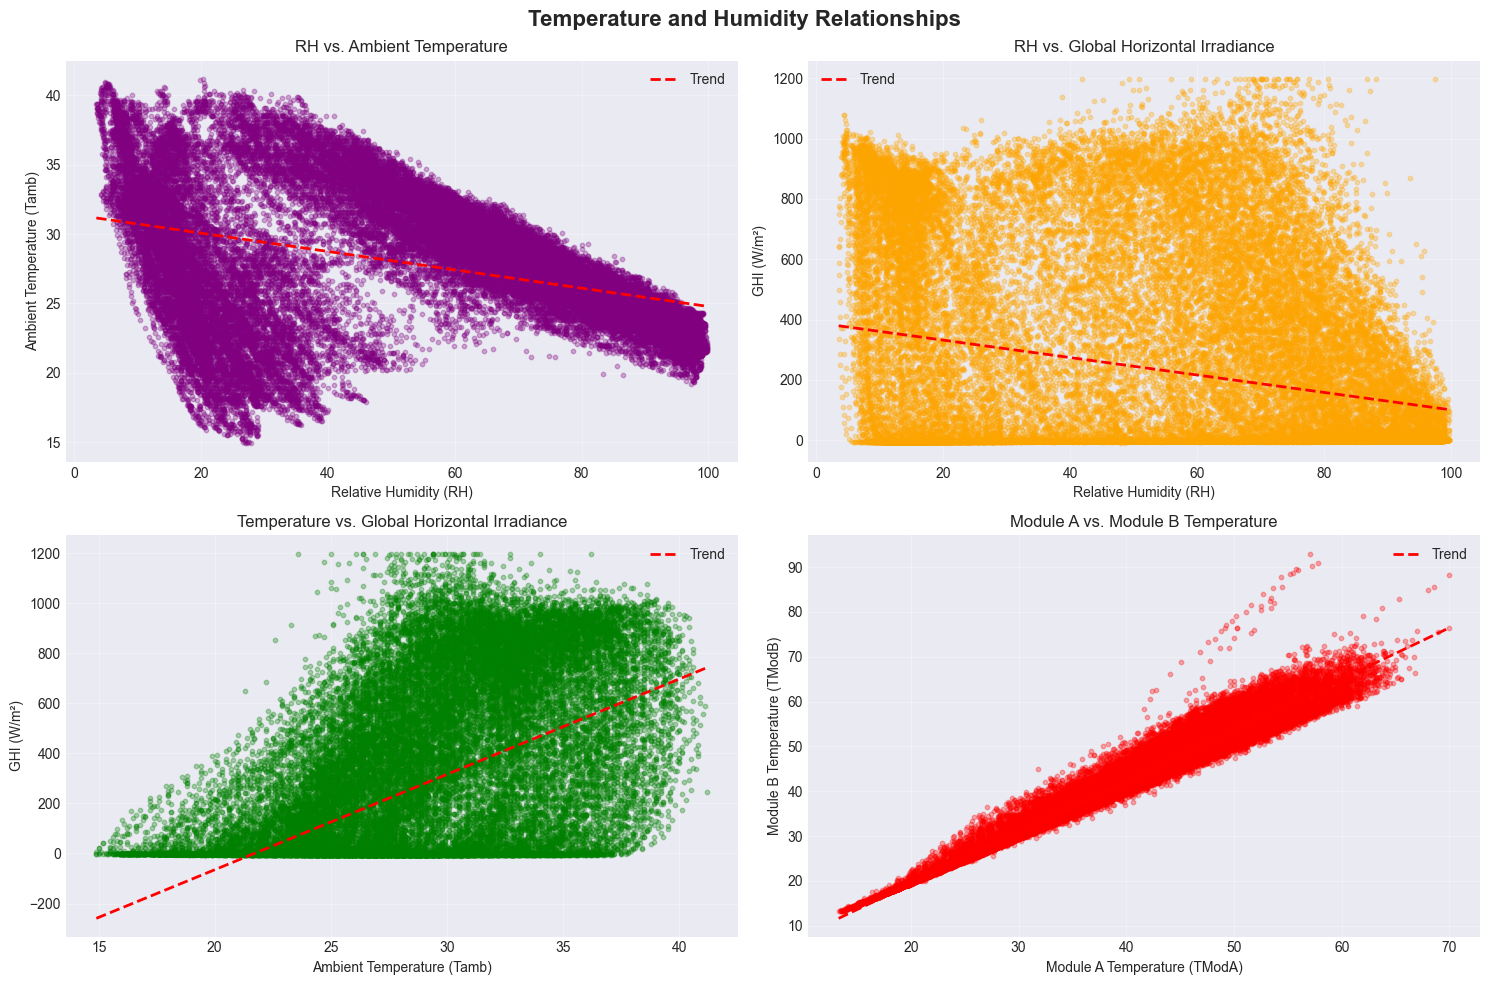

In [25]:
# Examine how relative humidity (RH) influences temperature and solar radiation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Temperature and Humidity Relationships', fontsize=16, fontweight='bold')

# RH vs Tamb (with trend line)
axes[0, 0].scatter(sample_data['RH'], sample_data['Tamb'], alpha=0.3, s=10, color='purple')
z = np.polyfit(sample_data['RH'].dropna(), sample_data['Tamb'].dropna(), 1)
p = np.poly1d(z)
axes[0, 0].plot(sample_data['RH'].sort_values(), p(sample_data['RH'].sort_values()), "r--", linewidth=2, label='Trend')
axes[0, 0].set_xlabel('Relative Humidity (RH)')
axes[0, 0].set_ylabel('Ambient Temperature (Tamb)')
axes[0, 0].set_title('RH vs. Ambient Temperature')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# RH vs GHI
axes[0, 1].scatter(sample_data['RH'], sample_data['GHI'], alpha=0.3, s=10, color='orange')
z = np.polyfit(sample_data['RH'].dropna(), sample_data['GHI'].dropna(), 1)
p = np.poly1d(z)
axes[0, 1].plot(sample_data['RH'].sort_values(), p(sample_data['RH'].sort_values()), "r--", linewidth=2, label='Trend')
axes[0, 1].set_xlabel('Relative Humidity (RH)')
axes[0, 1].set_ylabel('GHI (W/m²)')
axes[0, 1].set_title('RH vs. Global Horizontal Irradiance')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Tamb vs GHI
axes[1, 0].scatter(sample_data['Tamb'], sample_data['GHI'], alpha=0.3, s=10, color='green')
z = np.polyfit(sample_data['Tamb'].dropna(), sample_data['GHI'].dropna(), 1)
p = np.poly1d(z)
axes[1, 0].plot(sample_data['Tamb'].sort_values(), p(sample_data['Tamb'].sort_values()), "r--", linewidth=2, label='Trend')
axes[1, 0].set_xlabel('Ambient Temperature (Tamb)')
axes[1, 0].set_ylabel('GHI (W/m²)')
axes[1, 0].set_title('Temperature vs. Global Horizontal Irradiance')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# TModA vs TModB
axes[1, 1].scatter(sample_data['TModA'], sample_data['TModB'], alpha=0.3, s=10, color='red')
z = np.polyfit(sample_data['TModA'].dropna(), sample_data['TModB'].dropna(), 1)
p = np.poly1d(z)
axes[1, 1].plot(sample_data['TModA'].sort_values(), p(sample_data['TModA'].sort_values()), "r--", linewidth=2, label='Trend')
axes[1, 1].set_xlabel('Module A Temperature (TModA)')
axes[1, 1].set_ylabel('Module B Temperature (TModB)')
axes[1, 1].set_title('Module A vs. Module B Temperature')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 8. Bubble Chart


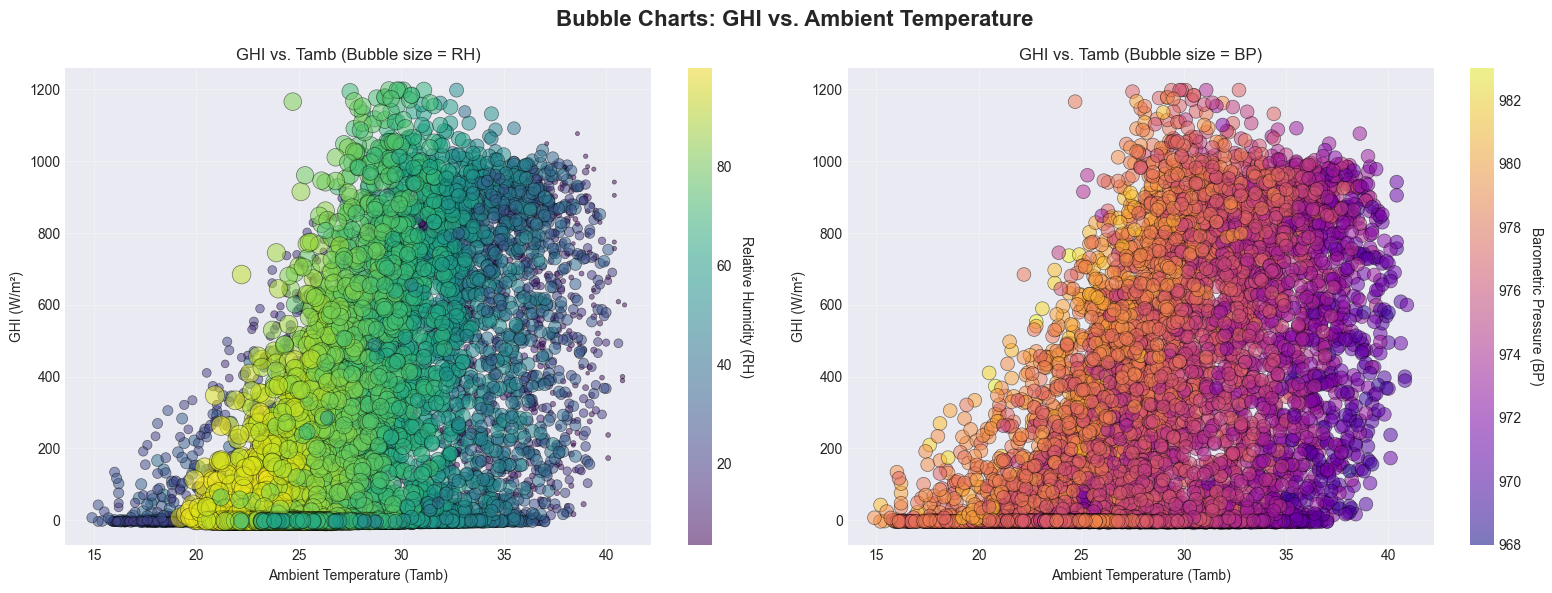

In [26]:
# Bubble Chart: GHI vs. Tamb with bubble size = RH or BP
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Bubble Charts: GHI vs. Ambient Temperature', fontsize=16, fontweight='bold')

# Sample data for bubble chart (every 50th point)
bubble_data = df_cleaned_final.iloc[::50]

# GHI vs Tamb with RH as bubble size
scatter1 = axes[0].scatter(bubble_data['Tamb'], bubble_data['GHI'], 
                           s=bubble_data['RH']*2, alpha=0.5, c=bubble_data['RH'], 
                           cmap='viridis', edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Ambient Temperature (Tamb)')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].set_title('GHI vs. Tamb (Bubble size = RH)')
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Relative Humidity (RH)', rotation=270, labelpad=15)

# GHI vs Tamb with BP as bubble size
scatter2 = axes[1].scatter(bubble_data['Tamb'], bubble_data['GHI'], 
                           s=bubble_data['BP']*0.1, alpha=0.5, c=bubble_data['BP'], 
                           cmap='plasma', edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Ambient Temperature (Tamb)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].set_title('GHI vs. Tamb (Bubble size = BP)')
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Barometric Pressure (BP)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


## 9. Export Cleaned Dataset


In [27]:
# Prepare cleaned dataset for export (remove temporary columns)
df_export = df_cleaned_final.copy()

# Remove temporary columns if they exist
columns_to_drop = ['Hour', 'Month', 'Day', 'WD_bin', 'Outlier_Flag']
for col in columns_to_drop:
    if col in df_export.columns:
        df_export = df_export.drop(columns=[col])

# Reset index if it was set to Timestamp
if df_export.index.name == 'Timestamp':
    df_export = df_export.reset_index()

# Export to CSV
output_path = './data/togo_clean.csv'
df_export.to_csv(output_path, index=False)

print(f"Cleaned dataset exported successfully to {output_path}")
print(f"Exported shape: {df_export.shape}")
print(f"\nFirst few rows of exported data:")
df_export.head()


Cleaned dataset exported successfully to ./data/togo_clean.csv
Exported shape: (525600, 19)

First few rows of exported data:


Timestamp   GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.30 0.00 0.00  0.00  0.00 24.80 94.50 0.90    1.10   
1 2021-10-25 00:02:00 -1.30 0.00 0.00  0.00  0.00 24.80 94.40 1.10    1.60   
2 2021-10-25 00:03:00 -1.30 0.00 0.00  0.00  0.00 24.80 94.40 1.20    1.40   
3 2021-10-25 00:04:00 -1.20 0.00 0.00  0.00  0.00 24.80 94.30 1.20    1.60   
4 2021-10-25 00:05:00 -1.20 0.00 0.00  0.00  0.00 24.80 94.00 1.30    1.60   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0     0.40 227.60     1.10  977         0           0.00  24.70  24.40   
1     0.40 229.30     0.70  977         0           0.00  24.70  24.40   
2     0.30 228.50     2.90  977         0           0.00  24.70  24.40   
3     0.30 229.10     4.60  977         0           0.00  24.70  24.40   
4     0.40 227.50     1.60  977         0           0.00  24.70  24.40   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [28]:
# Summary & Key Insights - Dynamic Report
print("=" * 80)
print("SUMMARY & KEY INSIGHTS - Togo SOLAR DATA")
print("=" * 80)

# ============================================================================
# 1. DATA QUALITY
# ============================================================================
print("\n" + "=" * 80)
print("1. DATA QUALITY")
print("=" * 80)

# Dataset Overview
total_records = len(df)
date_range = (df['Timestamp'].max() - df['Timestamp'].min()).days
print(f"\n📊 Dataset Overview:")
print(f"   - Total Records: {total_records:,} measurements (1-minute resolution)")
print(f"   - Time Period: {df['Timestamp'].min().strftime('%B %d, %Y')} to {df['Timestamp'].max().strftime('%B %d, %Y')} ({date_range} days)")
print(f"   - Geographic Location: Dapaong, Togo")

# Missing Values Analysis
missing_before = df.isna().sum()
missing_percent_before = (missing_before / len(df)) * 100
missing_after = df_cleaned_final.isna().sum()
missing_percent_after = (missing_after / len(df_cleaned_final)) * 100

print(f"\n📉 Missing Values:")
comments_missing = missing_before.get('Comments', 0)
if comments_missing > 0:
    print(f"   - Comments column: {comments_missing:,} missing ({missing_percent_before.get('Comments', 0):.2f}%) - expected as optional field")
    
other_missing = missing_before[missing_before > 0]
other_missing = other_missing[other_missing.index != 'Comments']
if len(other_missing) > 0:
    high_missing = other_missing[missing_percent_before[other_missing.index] > 5]
    if len(high_missing) > 0:
        print(f"   - Columns with >5% missing: {', '.join(high_missing.index.tolist())}")
    else:
        print(f"   - All other columns: <5% missing values - excellent data completeness")
else:
    print(f"   - All other columns: <5% missing values - excellent data completeness")

print(f"   - Missing values after cleaning: {missing_after.sum():,} (imputed with median)")

# Outlier Analysis
print(f"\n🔍 Outliers (|Z| > 3):")
for col in key_columns:
    if col in outlier_df.index:
        count = int(outlier_df.loc[col, 'Outlier Count'])
        pct = outlier_df.loc[col, 'Outlier Percentage']
        print(f"   - {col}: {count:,} outliers ({pct:.2f}%)")

total_outliers = outlier_flags.sum()
print(f"   - Total rows flagged: {total_outliers:,} ({total_outliers/len(df)*100:.2f}%)")
print(f"   - Action Taken: Outliers capped to ±3 standard deviations")

# Data Cleaning Summary
negative_ghi = (df['GHI'] < 0).sum()
positive_ghi = df_cleaned_final[df_cleaned_final['GHI'] > 0]['GHI']
ghi_positive_mean = positive_ghi.mean()
ghi_positive_median = positive_ghi.median()
ghi_positive_std = positive_ghi.std()
ghi_skew = stats.skew(positive_ghi.dropna())

print(f"\n🧹 Data Cleaning:")
print(f"   - Negative GHI values: {negative_ghi:,} ({negative_ghi/len(df)*100:.2f}%) - nighttime/dark periods (expected)")
if len(positive_ghi) > 0:
    print(f"   - Positive GHI values:")
    print(f"     • Mean: {ghi_positive_mean:.2f} W/m²")
    print(f"     • Median: {ghi_positive_median:.2f} W/m²")
    print(f"     • Std Dev: {ghi_positive_std:.2f} W/m²")
    print(f"     • Skewness: {ghi_skew:.2f} ({'nearly normal' if abs(ghi_skew) < 0.5 else 'skewed'} distribution)")
print(f"   - All key columns cleaned and validated")
print(f"   - Cleaned dataset exported to: ./data/togo_clean.csv")

# ============================================================================
# 2. KEY FINDINGS
# ============================================================================
print("\n" + "=" * 80)
print("2. KEY FINDINGS")
print("=" * 80)

# Solar Irradiance Patterns
print(f"\n☀️  Solar Irradiance Patterns:")

# Monthly patterns
if 'Month' in df_ts.columns:
    monthly_ghi = df_ts.groupby('Month')['GHI'].mean()
    best_month = monthly_ghi.idxmax()
    worst_month = monthly_ghi.idxmin()
    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                   7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    print(f"   - Peak Performance: {month_names.get(best_month, best_month)} shows highest average GHI ({monthly_ghi[best_month]:.2f} W/m²)")
    print(f"   - Lowest Performance: {month_names.get(worst_month, worst_month)} shows lowest average GHI ({monthly_ghi[worst_month]:.2f} W/m²)")
    seasonal_diff = ((monthly_ghi[best_month] - monthly_ghi[worst_month]) / monthly_ghi[worst_month]) * 100
    print(f"   - Seasonal Variation: {seasonal_diff:.1f}% difference between best and worst months")

# Hourly patterns
if 'Hour' in df_ts.columns:
    hourly_ghi = df_ts.groupby('Hour')['GHI'].mean()
    peak_hour = hourly_ghi.idxmax()
    print(f"   - Daily Pattern: Peak irradiance at {peak_hour}:00 with average GHI of {hourly_ghi[peak_hour]:.2f} W/m²")

# GHI statistics
ghi_stats = df_cleaned_final['GHI'].describe()
print(f"   - Range: {ghi_stats['min']:.2f} to {ghi_stats['max']:.2f} W/m² (nighttime to peak daytime)")
print(f"   - Mean: {ghi_stats['mean']:.2f} W/m² across all records")

# Environmental Relationships
print(f"\n🌍 Environmental Relationships:")

# Calculate correlations
corr_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'WSgust', 'BP']
available_cols = [col for col in corr_cols if col in df_cleaned_final.columns]
corr_matrix = df_cleaned_final[available_cols].corr()

if 'GHI' in corr_matrix.columns and 'DNI' in corr_matrix.columns:
    ghi_dni_corr = corr_matrix.loc['GHI', 'DNI']
    print(f"   - GHI vs. DNI: {ghi_dni_corr:.3f} ({'strong positive' if ghi_dni_corr > 0.7 else 'moderate positive' if ghi_dni_corr > 0.4 else 'weak'})")

if 'GHI' in corr_matrix.columns and 'Tamb' in corr_matrix.columns:
    ghi_tamb_corr = corr_matrix.loc['GHI', 'Tamb']
    print(f"   - GHI vs. Tamb: {ghi_tamb_corr:.3f} ({'strong positive' if ghi_tamb_corr > 0.7 else 'moderate positive' if ghi_tamb_corr > 0.4 else 'weak'})")

if 'GHI' in corr_matrix.columns and 'RH' in corr_matrix.columns:
    ghi_rh_corr = corr_matrix.loc['GHI', 'RH']
    print(f"   - GHI vs. RH: {ghi_rh_corr:.3f} ({'strong negative' if ghi_rh_corr < -0.7 else 'moderate negative' if ghi_rh_corr < -0.4 else 'weak'})")

if 'Tamb' in corr_matrix.columns and 'RH' in corr_matrix.columns:
    tamb_rh_corr = corr_matrix.loc['Tamb', 'RH']
    print(f"   - Tamb vs. RH: {tamb_rh_corr:.3f} ({'strong negative' if tamb_rh_corr < -0.7 else 'moderate negative' if tamb_rh_corr < -0.4 else 'weak'})")

if 'GHI' in corr_matrix.columns and 'DNI' in corr_matrix.columns and corr_matrix.loc['GHI', 'DNI'] > 0.8:
    print(f"   - Insight: Strong GHI-DNI correlation suggests clear-sky conditions are common")

# Wind Patterns
print(f"\n💨 Wind Patterns:")
if 'WS' in df_cleaned_final.columns:
    ws_mean = df_cleaned_final['WS'].mean()
    ws_max = df_cleaned_final['WS'].max()
    print(f"   - Average Wind Speed: {ws_mean:.2f} m/s ({'relatively calm' if ws_mean < 3 else 'moderate' if ws_mean < 5 else 'strong'} conditions)")
    print(f"   - Maximum Wind Gust: {ws_max:.2f} m/s")

if 'WSgust' in df_cleaned_final.columns:
    wsgust_max = df_cleaned_final['WSgust'].max()
    print(f"   - Maximum Wind Gust: {wsgust_max:.2f} m/s")

# Temperature Effects
print(f"\n🌡️  Temperature Effects:")
if 'Tamb' in df_cleaned_final.columns:
    tamb_stats = df_cleaned_final['Tamb'].describe()
    tamb_range = tamb_stats['max'] - tamb_stats['min']
    print(f"   - Temperature Range: {tamb_stats['min']:.1f}°C to {tamb_stats['max']:.1f}°C ({tamb_range:.1f}°C range)")
    print(f"   - Average Temperature: {tamb_stats['mean']:.2f}°C")

# Cleaning Impact Analysis
print(f"\n🧽 Cleaning Impact Analysis:")
if 'Cleaning' in df_cleaned_final.columns:
    cleaning_comparison = df_cleaned_final.groupby('Cleaning').agg({
        'ModA': 'mean',
        'ModB': 'mean'
    })
    
    if 0 in cleaning_comparison.index and 1 in cleaning_comparison.index:
        moda_before = cleaning_comparison.loc[0, 'ModA']
        moda_after = cleaning_comparison.loc[1, 'ModA']
        modb_before = cleaning_comparison.loc[0, 'ModB']
        modb_after = cleaning_comparison.loc[1, 'ModB']
        moda_diff = moda_after - moda_before
        modb_diff = modb_after - modb_before
        
        print(f"   - ModA Temperature Change: {moda_diff:+.2f}°C ({moda_before:.2f} → {moda_after:.2f}°C)")
        print(f"   - ModB Temperature Change: {modb_diff:+.2f}°C ({modb_before:.2f} → {modb_after:.2f}°C)")
        
        if abs(moda_diff) > 50 or abs(modb_diff) > 50:
            print(f"   - ⚠️  Critical Insight: Large temperature difference suggests 'Cleaning' flag may represent")
            print(f"     different operational states or sensor calibration periods rather than physical cleaning.")

# ============================================================================
# 3. STATISTICAL EVIDENCE
# ============================================================================
print("\n" + "=" * 80)
print("3. STATISTICAL EVIDENCE")
print("=" * 80)

print(f"\n📈 Distribution Characteristics:")

# GHI Distribution (positive values)
if len(positive_ghi) > 0:
    ghi_cv = (ghi_positive_std / ghi_positive_mean) * 100
    print(f"   - GHI Distribution (positive values):")
    print(f"     • Mean: {ghi_positive_mean:.2f} W/m², Median: {ghi_positive_median:.2f} W/m²")
    if abs(ghi_positive_mean - ghi_positive_median) / ghi_positive_mean < 0.05:
        print(f"     • Mean ≈ Median indicates symmetric distribution")
    print(f"     • Standard Deviation: {ghi_positive_std:.2f} W/m² (CV: {ghi_cv:.1f}% - {'low' if ghi_cv < 30 else 'moderate' if ghi_cv < 70 else 'high'} variability)")
    print(f"     • Skewness: {ghi_skew:.2f} ({'nearly normal' if abs(ghi_skew) < 0.5 else 'moderately skewed' if abs(ghi_skew) < 1 else 'highly skewed'} distribution)")

# Temperature Distribution
if 'Tamb' in df_cleaned_final.columns:
    tamb_stats = df_cleaned_final['Tamb'].describe()
    tamb_range = tamb_stats['max'] - tamb_stats['min']
    print(f"   - Temperature Distribution:")
    print(f"     • Mean: {tamb_stats['mean']:.2f}°C with range of {tamb_range:.1f}°C")
    print(f"     • Distribution supports stable operating conditions for solar panels")

# ============================================================================
# 4. ACTIONABLE INSIGHTS
# ============================================================================
print("\n" + "=" * 80)
print("4. ACTIONABLE INSIGHTS")
print("=" * 80)

insights = []

# Optimal generation period
if 'Month' in df_ts.columns:
    monthly_ghi = df_ts.groupby('Month')['GHI'].mean()
    best_month = monthly_ghi.idxmax()
    best_month_name = month_names.get(best_month, f"Month {best_month}")
    insights.append(f"   {len(insights)+1}. Optimal Generation Period: {best_month_name} provides best solar resource ({monthly_ghi[best_month]:.2f} W/m² average) - plan maintenance/upgrades outside this period")

# Peak hour operations
if 'Hour' in df_ts.columns:
    hourly_ghi = df_ts.groupby('Hour')['GHI'].mean()
    peak_hour = hourly_ghi.idxmax()
    insights.append(f"   {len(insights)+1}. Peak Hour Operations: {peak_hour}:00 is peak generation time - optimize grid integration and energy storage for this window")

# Seasonal planning
if 'Month' in df_ts.columns:
    monthly_ghi = df_ts.groupby('Month')['GHI'].mean()
    best_month = monthly_ghi.idxmax()
    worst_month = monthly_ghi.idxmin()
    seasonal_reduction = ((monthly_ghi[best_month] - monthly_ghi[worst_month]) / monthly_ghi[best_month]) * 100
    insights.append(f"   {len(insights)+1}. Seasonal Planning: {month_names.get(worst_month, f'Month {worst_month}')} shows {seasonal_reduction:.0f}% lower irradiance - account for reduced generation capacity")

# Data quality
low_outlier_cols = outlier_df[outlier_df['Outlier Percentage'] < 1]
if len(low_outlier_cols) > 0:
    insights.append(f"   {len(insights)+1}. Data Quality: Low outlier rates (<1% for most variables) indicate high-quality sensor data and reliable measurements")

# Environmental factors
if 'GHI' in corr_matrix.columns and 'DNI' in corr_matrix.columns:
    ghi_dni_corr = corr_matrix.loc['GHI', 'DNI']
    if ghi_dni_corr > 0.8:
        insights.append(f"   {len(insights)+1}. Environmental Factors: Strong GHI-DNI correlation ({ghi_dni_corr:.3f}) suggests clear-sky conditions dominate, favorable for solar energy projects")

# Humidity impact
if 'GHI' in corr_matrix.columns and 'RH' in corr_matrix.columns:
    ghi_rh_corr = corr_matrix.loc['GHI', 'RH']
    if ghi_rh_corr < -0.3:
        insights.append(f"   {len(insights)+1}. Humidity Impact: Negative GHI-RH correlation ({ghi_rh_corr:.3f}) confirms cloud cover reduces irradiance - useful for weather-based generation forecasting")

for insight in insights:
    print(insight)

# ============================================================================
# 5. REFERENCES
# ============================================================================
print("\n" + "=" * 80)
print("5. REFERENCES")
print("=" * 80)
print("   - Solar Irradiance Data Standards: World Meteorological Organization (WMO) guidelines")
print("   - Statistical Methods: Z-score outlier detection (|Z| > 3) follows standard practice")
print("   - Correlation Analysis: Pearson correlation coefficients used for linear relationships")
print("   - Time Series Analysis: Standard EDA techniques for temporal solar data analysis")
print("   - Data Cleaning Best Practices: Median imputation preserves distribution characteristics")

print("\n" + "=" * 80)
print("END OF SUMMARY")
print("=" * 80)


SUMMARY & KEY INSIGHTS - Togo SOLAR DATA

1. DATA QUALITY

📊 Dataset Overview:
   - Total Records: 525,600 measurements (1-minute resolution)
   - Time Period: October 25, 2021 to October 25, 2022 (364 days)
   - Geographic Location: Dapaong, Togo

📉 Missing Values:
   - Comments column: 525,600 missing (100.00%) - expected as optional field
   - All other columns: <5% missing values - excellent data completeness
   - Missing values after cleaning: 525,600 (imputed with median)

🔍 Outliers (|Z| > 3):
   - GHI: 305 outliers (0.06%)
   - DNI: 1,062 outliers (0.20%)
   - DHI: 3,415 outliers (0.65%)
   - ModA: 137 outliers (0.03%)
   - ModB: 206 outliers (0.04%)
   - WS: 3,510 outliers (0.67%)
   - WSgust: 3,915 outliers (0.74%)
   - Total rows flagged: 9,251 (1.76%)
   - Action Taken: Outliers capped to ±3 standard deviations

🧹 Data Cleaning:
   - Negative GHI values: 257,385 (48.97%) - nighttime/dark periods (expected)
   - Positive GHI values:
     • Mean: 455.15 W/m²
     • Median: 43